## Exercise 8
# K-means, K-mediods, Agglomerative methods - CLUSTERING

### 1. k-means

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values

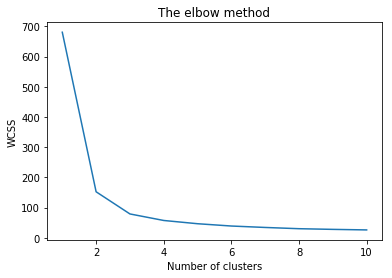

In [28]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

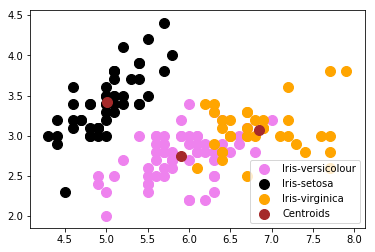

In [31]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'violet', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'brown', label = 'Centroids')
plt.legend()

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### 2. Agglomerative Clustering

In [4]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

def plot_dendrogram(model, **kwargs):
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

### Single Linkage

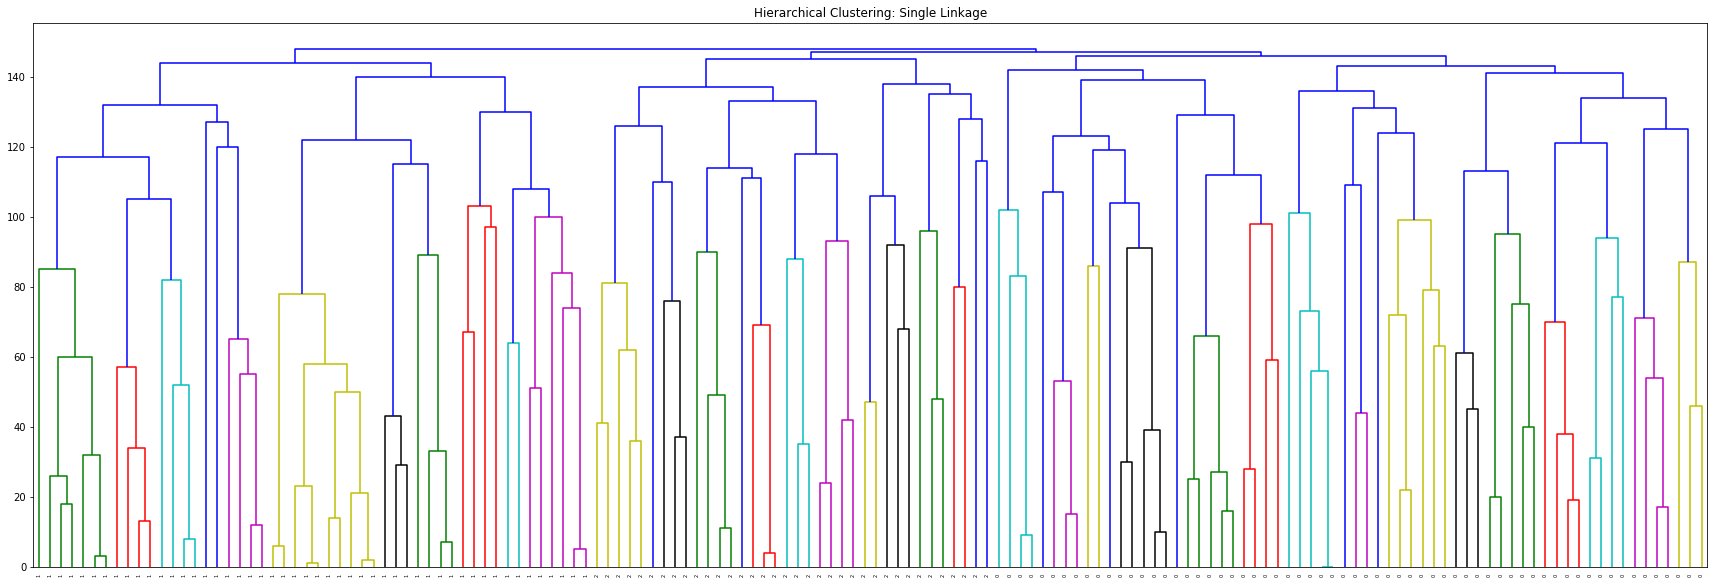

In [22]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="ward",n_clusters=3)
singleLinkage = model.fit(X)

plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering: Single Linkage')
plot_dendrogram(model, labels=singleLinkage.labels_)
plt.show()

###  Complete linkage

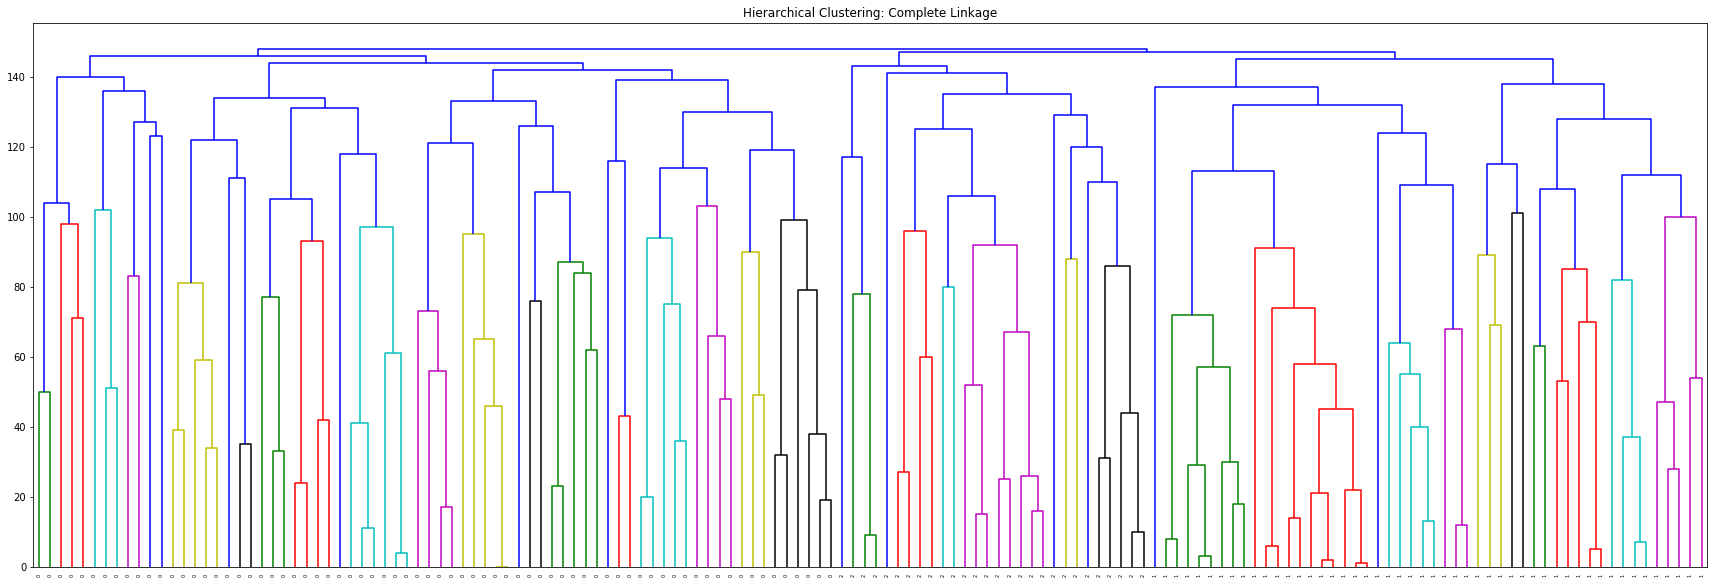

In [23]:
model = AgglomerativeClustering(linkage="complete",n_clusters=3)
completeLinkage = model.fit(X)

plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering: Complete Linkage')
plot_dendrogram(model, labels=completeLinkage.labels_)
plt.show()

### Average linkage

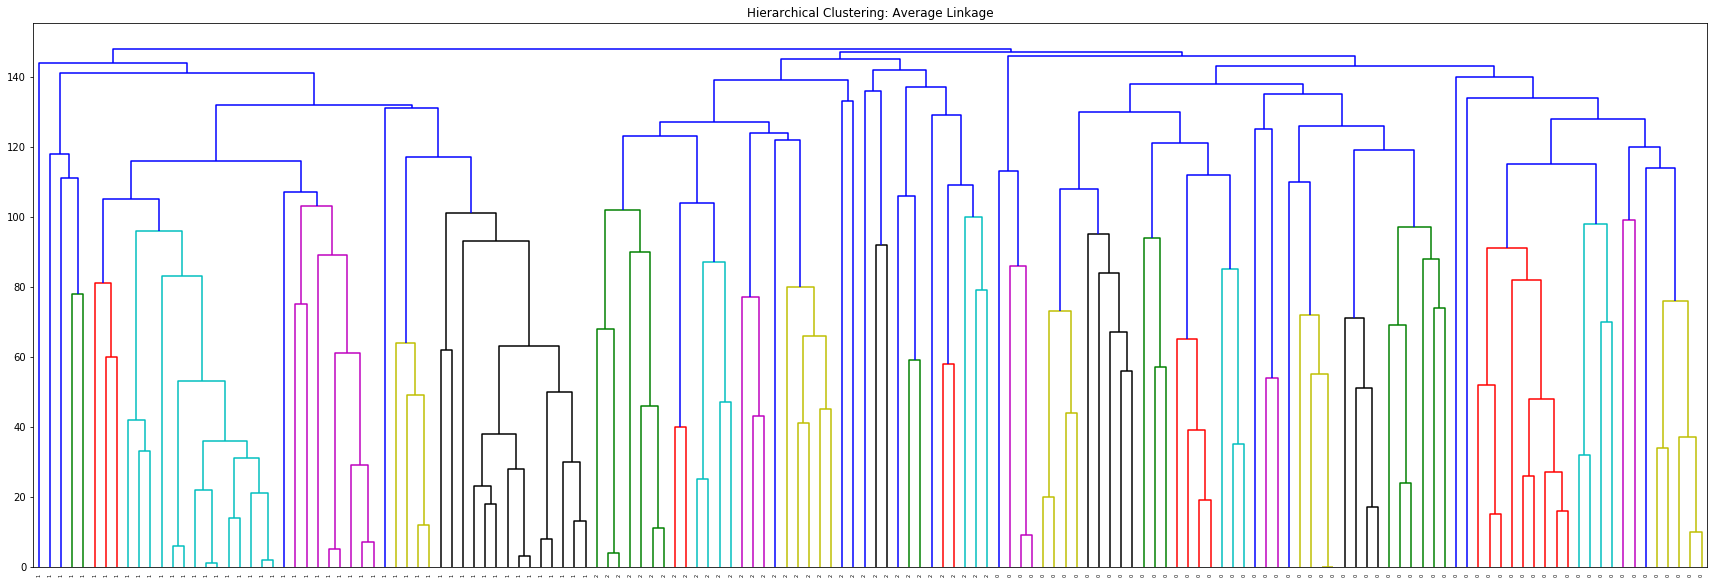

In [24]:
model = AgglomerativeClustering(linkage="average",n_clusters=3)
averageLinkage = model.fit(X)

plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering: Average Linkage')
plot_dendrogram(model, labels=averageLinkage.labels_)
plt.show()